In [2]:
import pandas as pd
import openai
import os
import gspread
import numpy as np
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAIKEY')

# Goal:
1. Add all state of province detail to each city
2. population
3. download standard city boundary from openstreetmap
4. CO2 emission or Gastro usage
5. GPD per capita

In [15]:
import os
import gspread
import numpy as np
import pandas as pd

def read_url(url, SHEET_NAME):
    SHEET_ID = url.split("/")[5]
    spreadsheet = gc.open_by_key(SHEET_ID)
    worksheet = spreadsheet.worksheet(SHEET_NAME)
    rows = worksheet.get_all_records()
    df_spread = pd.DataFrame(rows)
    return df_spread, worksheet

serviceaccount = "../../google_drive_personal.json"
gc = gspread.service_account(filename=serviceaccount)
GC_URL = "https://docs.google.com/spreadsheets/d/1o5gFmZPUoDwrrbfE6M26uJF3HnEZll02ivnOxP6K6Xw/edit?usp=sharing"

SHEETNAME = "select_city_classifier"
city_meta, other_worksheet = read_url(GC_URL, SHEETNAME)
city_meta = city_meta[city_meta['City']!=''].reset_index(drop = True)
city_meta["country_clean"] = np.where(city_meta["Country"].isin(["USA", "United States"]), 
                                      "United States of America",
                                      city_meta["Country"]
                                     )

## 1. ADD all state names use chatgpt 

In [7]:

def get_completion(messages, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    # messages = [{"role": "user", "content": prompt}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

In [22]:
city_meta_str = city_meta.apply(lambda x: f"{x['City']}, {x['country_clean']}", axis=1).tolist()

input_city = ";".join(city_meta_str[:2])
input_city

'Hindupur, India;Vijayawada, India'

In [42]:
prompt = """
Your task is to:
Read a city and country combinations below inside the triple backquote. \
The city and country are separated by a comma. \
Input examples is: "city_1, country_1".
Given the input city and country combination, you should return the state or province of the city and country combination in the format like:\
"state: returned state or province".\
Input city and country combinations:```{input_city}```
"""
# messages = [{"role": "user", "content": prompt}]
# answer = get_completion(messages)
# # # messages.append({"role": "assistant", "content": answer})
# answer

In [47]:
from tqdm import tqdm
allstates = []
for input_city in tqdm(city_meta_str):
    # prompt.format(input_city = input_city)
    messages = [{"role": "user", "content": prompt.format(input_city = input_city)}]
    answer = get_completion(messages)
    print(answer)
    allstates.append(answer)

  1%|          | 1/127 [00:00<01:42,  1.22it/s]

Output: state: Andhra Pradesh


  2%|▏         | 2/127 [00:01<01:43,  1.21it/s]

Output: state: Andhra Pradesh


  2%|▏         | 3/127 [00:02<01:27,  1.41it/s]

state: Rangpur Division


  3%|▎         | 4/127 [00:02<01:16,  1.61it/s]

state: British Columbia


  4%|▍         | 5/127 [00:03<01:05,  1.85it/s]

state: Santiago


  5%|▍         | 6/127 [00:03<01:03,  1.91it/s]

state: Cesar


  6%|▌         | 7/127 [00:04<01:11,  1.68it/s]

state: Perm Krai


  6%|▋         | 8/127 [00:04<01:09,  1.72it/s]

state: Rivne


  7%|▋         | 9/127 [00:05<01:02,  1.88it/s]

state: West Java


  8%|▊         | 10/127 [00:05<01:00,  1.92it/s]

state: West Java


  9%|▊         | 11/127 [00:06<01:11,  1.61it/s]

Output: state: Tel Aviv District


  9%|▉         | 12/127 [00:07<01:05,  1.75it/s]

state: Bahia


 10%|█         | 13/127 [00:07<01:01,  1.85it/s]

Output:
state: Metro Manila


 11%|█         | 14/127 [00:09<01:53,  1.01s/it]

Output: state: Gombe


 12%|█▏        | 15/127 [00:10<01:38,  1.14it/s]

Output:
state: Guatemala


 13%|█▎        | 16/127 [00:10<01:24,  1.32it/s]

state: Maharashtra


 13%|█▎        | 17/127 [00:11<01:29,  1.23it/s]

state: Pays de la Loire


 14%|█▍        | 18/127 [00:12<01:17,  1.41it/s]

state: Cochabamba


 15%|█▍        | 19/127 [00:12<01:08,  1.57it/s]

state: Bahia


 16%|█▌        | 20/127 [00:13<01:06,  1.61it/s]

Output: state: Nizhny Novgorod Oblast


 17%|█▋        | 21/127 [00:13<01:00,  1.74it/s]

Output: state: Uttar Pradesh


 17%|█▋        | 22/127 [00:14<00:56,  1.85it/s]

state: Astrakhan Oblast


 18%|█▊        | 23/127 [00:14<00:53,  1.94it/s]

Output: state: Overijssel


 19%|█▉        | 24/127 [00:15<00:53,  1.91it/s]

Output: state: Tyumen Oblast


 20%|█▉        | 25/127 [00:15<00:50,  2.01it/s]

state: Texas


 20%|██        | 26/127 [00:15<00:47,  2.14it/s]

state: California


 21%|██▏       | 27/127 [00:16<00:49,  2.04it/s]

state: Negros Occidental


 22%|██▏       | 28/127 [00:17<00:49,  1.99it/s]

Output: state: Sicily


 23%|██▎       | 29/127 [00:17<00:48,  2.03it/s]

Output: state: Cebu


 24%|██▎       | 30/127 [00:17<00:45,  2.13it/s]

state: Florida


 24%|██▍       | 31/127 [00:18<00:55,  1.72it/s]

Output: state: Central Region


 25%|██▌       | 32/127 [00:19<00:54,  1.73it/s]

Output: state: Florida


 26%|██▌       | 33/127 [00:19<00:52,  1.79it/s]

state: Kaunas County


 27%|██▋       | 34/127 [00:20<00:49,  1.87it/s]

state: California


 28%|██▊       | 35/127 [00:20<00:52,  1.75it/s]

state: Greater Manchester


 28%|██▊       | 36/127 [00:21<00:49,  1.85it/s]

state: Île-de-France


 29%|██▉       | 37/127 [00:22<01:15,  1.20it/s]

state: Jalisco


 30%|██▉       | 38/127 [00:23<01:06,  1.34it/s]

state: Tamaulipas


 31%|███       | 39/127 [00:23<00:59,  1.49it/s]

Output: state: Belgrade


 31%|███▏      | 40/127 [00:24<00:54,  1.58it/s]

State: Minnesota


 32%|███▏      | 41/127 [00:24<00:48,  1.78it/s]

state: Antwerp


 33%|███▎      | 42/127 [00:25<00:54,  1.57it/s]

state: Greater Accra


 34%|███▍      | 43/127 [00:26<00:51,  1.63it/s]

Output:
state: Tocantins


 35%|███▍      | 44/127 [00:27<00:55,  1.50it/s]

Output: state: Sinaloa


 35%|███▌      | 45/127 [00:27<00:50,  1.61it/s]

Output:
state: Ohio


 36%|███▌      | 46/127 [00:28<00:45,  1.77it/s]

state: Maharashtra


 37%|███▋      | 47/127 [00:28<00:41,  1.94it/s]

Output: state: Maharashtra


 38%|███▊      | 48/127 [00:29<00:50,  1.56it/s]

Output: state: Rajshahi


 39%|███▊      | 49/127 [00:29<00:44,  1.74it/s]

Output: state: Kerala


 39%|███▉      | 50/127 [00:30<00:40,  1.89it/s]

Output: state: Ohio


 40%|████      | 51/127 [00:30<00:42,  1.80it/s]

Output: state: Santa Catarina


 41%|████      | 52/127 [00:31<00:44,  1.68it/s]

Output: state: Wellington


 42%|████▏     | 53/127 [00:32<00:49,  1.51it/s]

state: Massachusetts


 43%|████▎     | 54/127 [00:33<00:52,  1.40it/s]

Output: state: England


 43%|████▎     | 55/127 [00:33<00:51,  1.41it/s]

Output:
state: Sao Paulo


 44%|████▍     | 56/127 [00:34<00:48,  1.45it/s]

Output: state: North Sumatra


 45%|████▍     | 57/127 [00:35<00:49,  1.41it/s]

state: Bavaria


 46%|████▌     | 58/127 [00:35<00:45,  1.50it/s]

state: South-East


 46%|████▋     | 59/127 [00:36<00:44,  1.54it/s]

state: Jerusalem District


 47%|████▋     | 60/127 [00:36<00:39,  1.68it/s]

state: South Sumatra


 48%|████▊     | 61/127 [00:37<00:37,  1.74it/s]

Output: state: Maharashtra


 49%|████▉     | 62/127 [00:37<00:35,  1.83it/s]

state: Madrid


 50%|████▉     | 63/127 [00:38<00:36,  1.75it/s]

Output: state: Stockholm County


 50%|█████     | 64/127 [00:39<00:35,  1.78it/s]

Output: state: Kyiv City


 51%|█████     | 65/127 [00:39<00:32,  1.92it/s]

state: Taipei City


 52%|█████▏    | 66/127 [00:40<00:32,  1.88it/s]

state: Uttar Pradesh


 53%|█████▎    | 67/127 [00:40<00:34,  1.74it/s]

state: Capital Region


 54%|█████▎    | 68/127 [00:41<00:33,  1.78it/s]

Output:
state: Minas Gerais


 54%|█████▍    | 69/127 [00:41<00:31,  1.83it/s]

state: Kigali


 55%|█████▌    | 70/127 [00:42<00:28,  2.02it/s]

state: Colorado


 56%|█████▌    | 71/127 [00:42<00:27,  2.06it/s]

state: Dubai


 57%|█████▋    | 72/127 [00:43<00:26,  2.08it/s]

state: Vienna


 57%|█████▋    | 73/127 [00:43<00:25,  2.12it/s]

state: Oregon


 58%|█████▊    | 74/127 [00:44<00:25,  2.06it/s]

Output: state: North Carolina


 59%|█████▉    | 75/127 [00:44<00:27,  1.92it/s]

Output: state: Pichincha


 60%|█████▉    | 76/127 [00:45<00:24,  2.07it/s]

state: Karnataka


 61%|██████    | 77/127 [00:45<00:24,  2.03it/s]

state: Quebec


 61%|██████▏   | 78/127 [00:46<00:23,  2.09it/s]

state: Maharashtra


 62%|██████▏   | 79/127 [00:46<00:24,  1.99it/s]

state: Brussels Capital Region


 63%|██████▎   | 80/127 [00:47<00:23,  2.01it/s]

Output: state: Rajasthan


 64%|██████▍   | 81/127 [00:52<01:33,  2.04s/it]

Output: state: Cundinamarca


 65%|██████▍   | 82/127 [00:53<01:10,  1.56s/it]

state: Michigan


 65%|██████▌   | 83/127 [00:53<00:54,  1.23s/it]

state: N/A


 66%|██████▌   | 84/127 [00:54<00:47,  1.11s/it]

state: Parana


 67%|██████▋   | 85/127 [00:55<00:41,  1.00it/s]

Output: state: Central Macedonia


 68%|██████▊   | 86/127 [00:55<00:34,  1.18it/s]

state: Budapest


 69%|██████▊   | 87/127 [00:56<00:30,  1.33it/s]

state: Masovian Voivodeship


 69%|██████▉   | 88/127 [00:57<00:31,  1.23it/s]

state: N/A


 70%|███████   | 89/127 [00:57<00:29,  1.27it/s]

Output: state: Delhi


 71%|███████   | 90/127 [00:58<00:24,  1.49it/s]

state: Lazio


 72%|███████▏  | 91/127 [00:58<00:22,  1.57it/s]

state: Berlin


 72%|███████▏  | 92/127 [00:59<00:20,  1.74it/s]

state: Seoul


 73%|███████▎  | 93/127 [00:59<00:18,  1.81it/s]

Output: state: Yamaguchi


 74%|███████▍  | 94/127 [01:00<00:16,  1.97it/s]

state: Western Cape


 75%|███████▍  | 95/127 [01:00<00:16,  1.97it/s]

state: Nairobi


 76%|███████▌  | 96/127 [01:01<00:15,  2.02it/s]

state: Lagos


 76%|███████▋  | 97/127 [01:01<00:14,  2.01it/s]

Output: state: Telangana


 77%|███████▋  | 98/127 [01:02<00:14,  1.94it/s]

state: New York


 78%|███████▊  | 99/127 [01:02<00:14,  1.95it/s]

state: Attica


 79%|███████▊  | 100/127 [01:03<00:15,  1.74it/s]

state: Mexico City


 80%|███████▉  | 101/127 [01:04<00:14,  1.75it/s]

Output: state: Saint Petersburg


 80%|████████  | 102/127 [01:04<00:15,  1.59it/s]

state: Auckland


 81%|████████  | 103/127 [01:05<00:13,  1.80it/s]

state: Moscow


 82%|████████▏ | 104/127 [01:05<00:12,  1.91it/s]

state: California


 83%|████████▎ | 105/127 [01:06<00:10,  2.02it/s]

Output:
state: Istanbul


 83%|████████▎ | 106/127 [01:06<00:12,  1.68it/s]

Output: state: Tokyo


 84%|████████▍ | 107/127 [01:07<00:11,  1.69it/s]

Output: state: New South Wales


 85%|████████▌ | 108/127 [01:07<00:10,  1.80it/s]

state: England


 86%|████████▌ | 109/127 [01:08<00:09,  1.92it/s]

Output: state: Okayama


 87%|████████▋ | 110/127 [01:08<00:09,  1.88it/s]

Output: state: Gauteng


 87%|████████▋ | 111/127 [01:09<00:08,  1.91it/s]

Output: state: Fukuoka Prefecture


 88%|████████▊ | 112/127 [01:09<00:07,  1.94it/s]

state: Dhaka


 89%|████████▉ | 113/127 [01:10<00:07,  1.93it/s]

state: Federal Territory of Kuala Lumpur


 90%|████████▉ | 114/127 [01:11<00:10,  1.21it/s]

state: Texas


 91%|█████████ | 115/127 [01:12<00:08,  1.42it/s]

Output: state: Buenos Aires


 91%|█████████▏| 116/127 [01:12<00:06,  1.58it/s]

state: North Holland


 92%|█████████▏| 117/127 [01:13<00:05,  1.71it/s]

state: Pennsylvania


 93%|█████████▎| 118/127 [01:14<00:05,  1.63it/s]

Output:
state: Metro Manila


 94%|█████████▎| 119/127 [01:14<00:04,  1.80it/s]

state: Ontario


 94%|█████████▍| 120/127 [01:15<00:03,  1.76it/s]

Output: state: Sao Paulo


 95%|█████████▌| 121/127 [01:15<00:03,  1.78it/s]

Output: state: Lima


 96%|█████████▌| 122/127 [01:16<00:02,  1.84it/s]

Output:
state: Lombardy


 97%|█████████▋| 123/127 [01:16<00:02,  1.89it/s]

Output: state: Aichi


 98%|█████████▊| 124/127 [01:17<00:01,  1.95it/s]

state: Rio de Janeiro


 98%|█████████▊| 125/127 [01:17<00:00,  2.00it/s]

Output:
state: Jakarta


 99%|█████████▉| 126/127 [01:18<00:00,  2.02it/s]

Output: state: Bangkok


100%|██████████| 127/127 [01:18<00:00,  1.61it/s]

state: Illinois


In [49]:
allstates_clean = [x.split(":")[-1].strip() for x in allstates]
city_meta["State/Province"] = allstates_clean

['Andhra Pradesh',
 'Andhra Pradesh',
 'Rangpur Division',
 'British Columbia',
 'Santiago',
 'Cesar',
 'Perm Krai',
 'Rivne',
 'West Java',
 'West Java',
 'Tel Aviv District',
 'Bahia',
 'Metro Manila',
 'Gombe',
 'Guatemala',
 'Maharashtra',
 'Pays de la Loire',
 'Cochabamba',
 'Bahia',
 'Nizhny Novgorod Oblast',
 'Uttar Pradesh',
 'Astrakhan Oblast',
 'Overijssel',
 'Tyumen Oblast',
 'Texas',
 'California',
 'Negros Occidental',
 'Sicily',
 'Cebu',
 'Florida',
 'Central Region',
 'Florida',
 'Kaunas County',
 'California',
 'Greater Manchester',
 'Île-de-France',
 'Jalisco',
 'Tamaulipas',
 'Belgrade',
 'Minnesota',
 'Antwerp',
 'Greater Accra',
 'Tocantins',
 'Sinaloa',
 'Ohio',
 'Maharashtra',
 'Maharashtra',
 'Rajshahi',
 'Kerala',
 'Ohio',
 'Santa Catarina',
 'Wellington',
 'Massachusetts',
 'England',
 'Sao Paulo',
 'North Sumatra',
 'Bavaria',
 'South-East',
 'Jerusalem District',
 'South Sumatra',
 'Maharashtra',
 'Madrid',
 'Stockholm County',
 'Kyiv City',
 'Taipei City',
 

In [52]:
other_worksheet.update([city_meta.columns.values.tolist()] + city_meta.values.tolist())

{'spreadsheetId': '1o5gFmZPUoDwrrbfE6M26uJF3HnEZll02ivnOxP6K6Xw',
 'updatedRange': 'select_city_classifier!A1:V128',
 'updatedRows': 128,
 'updatedColumns': 22,
 'updatedCells': 2816}

In [66]:
# for US city, get associated county name
prompt = """
Your task is to:
Read a city and state combinations below inside the triple backquote. \
The city and state are separated by a comma. \
Input examples is: "city_1, state_1".
Given the input city and state combination, \
you should return a list of counties that the city intersects with combination in the format like:\
"county: [county_1, county_2, county_3]".\
Input city and country combinations:```{input_city}```
"""
us_city = city_meta[city_meta["country_clean"]=='United States of America'].reset_index(drop = True)
other_city = city_meta[city_meta["country_clean"]!='United States of America'].reset_index(drop = True)
us_city_str = us_city.apply(lambda x: f"{x['City']}, {x['State/Province']}", axis=1).tolist()

In [59]:
allcounties = []
for input_city in tqdm(us_city_str):
    messages = [{"role": "user", "content": prompt.format(input_city = input_city)}]
    answer = get_completion(messages)
    print(answer)
    allcounties.append(answer)

  6%|▌         | 1/18 [00:01<00:20,  1.18s/it]

county: [Bell]


 11%|█         | 2/18 [00:01<00:13,  1.19it/s]

county: [Stanislaus]


 17%|█▋        | 3/18 [00:02<00:11,  1.26it/s]

county: [Alachua]


 22%|██▏       | 4/18 [00:03<00:10,  1.28it/s]

county: [Miami-Dade]


 28%|██▊       | 5/18 [00:03<00:08,  1.46it/s]

county: [San Francisco]


 33%|███▎      | 6/18 [00:04<00:08,  1.45it/s]

county: [Hennepin, Ramsey]


 39%|███▉      | 7/18 [00:05<00:06,  1.58it/s]

county: [Lucas]


 44%|████▍     | 8/18 [00:05<00:06,  1.47it/s]

county: [Cuyahoga]


 50%|█████     | 9/18 [00:06<00:06,  1.42it/s]

county: [Suffolk]


 56%|█████▌    | 10/18 [00:07<00:05,  1.57it/s]

county: [Denver County]


 61%|██████    | 11/18 [00:07<00:04,  1.44it/s]

county: [Multnomah, Washington, Clackamas]


 67%|██████▋   | 12/18 [00:08<00:03,  1.60it/s]

county: [Wake]


 72%|███████▏  | 13/18 [00:08<00:03,  1.65it/s]

county: [Wayne]


 78%|███████▊  | 14/18 [00:09<00:02,  1.66it/s]

county: [New York]


 83%|████████▎ | 15/18 [00:10<00:01,  1.66it/s]

county: [Los Angeles County]


 89%|████████▉ | 16/18 [00:10<00:01,  1.61it/s]

county: [Harris]


 94%|█████████▍| 17/18 [00:11<00:00,  1.70it/s]

county: [Philadelphia County]


100%|██████████| 18/18 [00:11<00:00,  1.50it/s]

county: [Cook]


In [67]:
allcounties_clean = [x.split(":")[-1].strip() for x in allcounties]
us_city["county_ls"] = allcounties_clean

city_meta = pd.concat([us_city, other_city]).reset_index(drop=True)
city_meta["county_ls"] = city_meta["county_ls"].fillna("[]")

C:\Users\yuanzfan\AppData\Local\Temp\ipykernel_26912\637539880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_city["county_ls"] = allcounties_clean


,City,Country,State/Province,center_lat,center_lng,label,num_panoid,GSV Downloaded,Road Injury literature,Road injury data,...,top,pop_country,Diabetes mellitus,Mental and substance use disorders,Cardiovascular diseases,Road injury,urban_pop,pop source,country_clean,county_ls
0,Killeen,United States,Texas,31.117119,-97.727796,57,182310,87621,,,...,31.140409,329065,4275.074871,15385.702740,16900.440260,2376.142369,159172,2022,United States of America,[Bell]
1,Modesto,United States,California,37.639260,-120.997001,76,363968,90716,,,...,37.711337,329065,4275.074871,15385.702740,16900.440260,2376.142369,218069,2022,United States of America,[Stanislaus]
2,"Gainesville, FL",United States,Florida,29.651956,-82.324998,37,411255,105991,,,...,29.767622,329065,4275.074871,15385.702740,16900.440260,2376.142369,145214,2022,United States of America,[Alachua]
3,Miami,USA,Florida,25.761700,-80.191800,73,806659,123133,1,,...,25.855475,329065,4275.074871,15385.702740,16900.440260,2376.142369,449514,2022,United States of America,[Miami-Dade]
4,San Francisco,USA,California,37.774900,-122.419400,104,1346152,129104,1,,...,37.832246,329065,4275.074871,15385.702740,16900.440260,2376.142369,808437,2022,United States of America,[San Francisco]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Milan,Italy,Lombardy,45.465776,9.187412,74,1161816,4646129,,,...,45.535152,60550,800.455308,1545.910775,3014.821275,198.249616,1352000,2017,Italy,NaN
123,Nagoya,Japan,Aichi,35.174745,136.907539,81,1399215,5595654,,,...,35.259008,126860,869.184816,2071.935431,5627.788661,263.580055,2296000,2020,Japan,NaN
124,Rio de Janeiro,Brazil,Rio de Janeiro,-22.911502,-43.181365,99,1452099,5806835,,,...,-22.783303,211050,2455.225443,6523.384896,8693.866543,1936.841720,6748000,2020,Brazil,NaN
125,Jakarta,Indonesia,Jakarta,-6.193973,106.822511,48,1675418,6701389,,,...,-6.074263,270626,3960.127149,4018.564483,17247.421460,1965.946502,10560000,2020,Indonesia,NaN


In [70]:
other_worksheet.update([city_meta.columns.values.tolist()] + city_meta.values.tolist())

{'spreadsheetId': '1o5gFmZPUoDwrrbfE6M26uJF3HnEZll02ivnOxP6K6Xw',
 'updatedRange': 'select_city_classifier!A1:W128',
 'updatedRows': 128,
 'updatedColumns': 23,
 'updatedCells': 2944}

## 3. Download all city boundary 
Use script

In [29]:
# conda activate geo311
import osmnx as ox
import geopandas as gpd

RAW_FOLDER = "/lustre1/g/geog_pyloo/05_timemachine/_raw/r_boundary_osm"
if not os.path.exists(RAW_FOLDER):
    os.makedirs(RAW_FOLDER)
    
    
# construct queries from the csv
city_meta["city_clean"] = city_meta["City"].apply(lambda x: x.split(",")[0])
city_meta["level_0_admin"] = np.where(city_meta["city_clean"]=="Taipei", "Taiwan", city_meta["country_clean"])
city_meta["level_0_admin"] = np.where(city_meta["country_clean"]=="United States of America", 
                                      city_meta["State/Province"], 
                                      city_meta["level_0_admin"])

city_meta["city_query"] = city_meta.apply(lambda x: x["city_clean"]+", " + x["level_0_admin"], axis = 1)
city_meta["city_query"] = np.where(city_meta["country_clean"]=="United States of America", 
                                   city_meta["city_query"]+", USA",
                                   city_meta["city_query"])

for i, q in enumearte(city_meta["city_query"].values):
    cityabbrlower = city_meta.at[i, "city_clean"].lower().replace(" ", "")
    boundary = ox.geocoder.geocode_to_gdf(q)
    print(boundary.crs)
    boundary = boundary.to_crs("EPSG:4326")
    boundary.to_file(os.path.join(RAW_FOLDER, f"{cityabbrlower}.geojson"), 
                        driver = "GeoJSON")
    print(cityabbrlower, " DONE")

In [33]:
def get_finished():
    files = os.listdir(RAW_FOLDER)
    city_finished = [x.split(".")[0] for x in files]
    return city_finished

city_finished = get_finished()

In [38]:
citylowerls = [x.lower().replace(" ", "") for x in city_meta["city_clean"].values]
remain = [x for x in citylowerls if x not in city_finished]
remain

['sydney', 'antwerp', 'belohorizonte', 'athens', 'johannesburg']

In [ ]:
for i, q in enumearte(remain):
    query = city_meta[city_meta["city_clean"]]
    boundary = ox.geocoder.geocode_to_gdf(q)
    print(boundary.crs)
    boundary = boundary.to_crs("EPSG:4326")
    boundary.to_file(os.path.join(RAW_FOLDER, f"{cityabbrlower}.geojson"), 
                        driver = "GeoJSON")
    print(cityabbrlower, " DONE")

In [8]:
# check the city boundary from the urban expansion project
PFOLDER = "/lustre1/g/geog_pyloo/05_timemachine/_transformed/t_urban_expansion/t_urban_expansion"
ALLFILES = os.listdir(PFOLDER)
len(ALLFILES)

196

In [13]:
# load roadnetwork of Hong Kong to check
GSV_FOLDER = "/lustre1/g/geog_pyloo/05_timemachine/GSV/gsv_rgb/{citylowerabbr}/road/osm.geojson"
road_gdf = gpd.read_file(GSV_FOLDER.format(citylowerabbr = "hongkong"))
road_gdf.head()


,u,v,osmid,name,length,length_meter,newID,geometry
0,24486579,9609040608,757840170,nan,17.149,18.555190,757840170_0,"LINESTRING (12709356.338 2546749.204, 12709374..."
1,24486579,9609016882,757843562,nan,39.161,42.372030,757843562_1,"LINESTRING (12709356.338 2546749.204, 12709324..."
2,24486579,9609016880,757840168,nan,40.035,43.318413,757840168_2,"LINESTRING (12709356.338 2546749.204, 12709349..."
3,24533064,2498627453,567856161,莊士敦道 Johnston Road,15.458,16.723251,567856161_3,"LINESTRING (12709699.403 2544758.143, 12709716..."
4,24533064,1618530627,743072632,莊士敦道 Johnston Road,38.526,41.680014,743072632_4,"LINESTRING (12709699.403 2544758.143, 12709657..."


<Axes: >

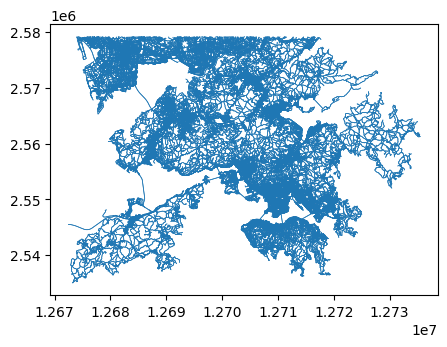

In [14]:
road_gdf.plot(figsize = (5,5), linewidth = 0.5)

In [10]:
def get_bound(city_abbr):
    if city_abbr == "hong_kong":
                geofilename = 'hong_kong,_hong_kong.geojson' # edge case
    elif city_abbr == "taipei":
        geofilename = 'taipei,_taiwan.geojson'
    else:
        geofilename = city_abbr + ".geojson"
    area = gpd.read_file(os.path.join(PFOLDER, geofilename))
    return area

area = get_bound("hong_kong")

<Axes: >

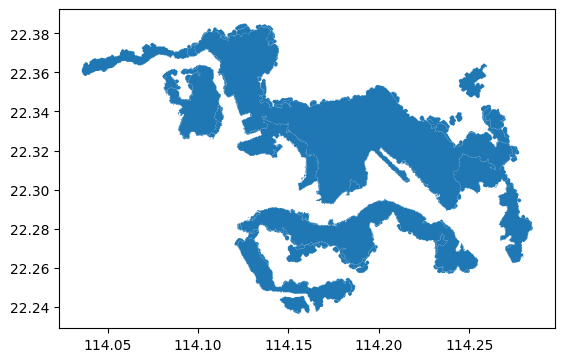

In [11]:
area.plot()